# Task #2 Predicting the percentage of marks of  student

In [16]:
#Importing Libraries
import numpy as np
import pandas as pd
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# importing the dataset

In [7]:
data=pd.read_csv('http://bit.ly/w-data') 

In [332]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


# Doing some data inspection

In [10]:
data.columns

Index(['Hours', 'Scores'], dtype='object')

In [11]:
data.shape

(25, 2)

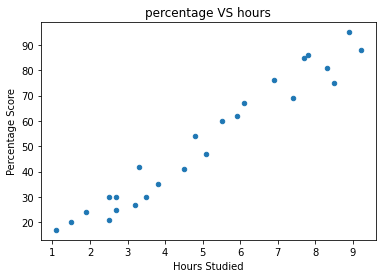

In [18]:
data.plot(x='Hours',y='Scores',kind='scatter')
plt.title('percentage VS hours')
plt.xlabel('Hours Studied')  
plt.ylabel('Percentage Score')  
plt.show()

# Above plot shows that both variables are highly correlated and we can also check with heatmap also.

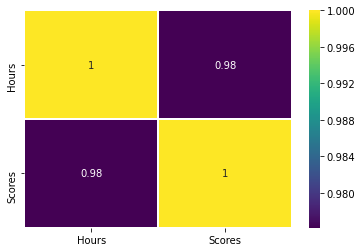

In [209]:
sns.heatmap(data.corr(),cmap="viridis",linewidths=0.5,annot=True)

# Preparing the data and Training the algorithm

In [185]:
x_var = data.iloc[:,:1].values  #independent variable
y_var = data.iloc[:,1].values

In [298]:
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(x_var,y_var, 
                            test_size=0.2,random_state=0)

In [300]:
from sklearn.linear_model import LinearRegression  
reg_model = LinearRegression()  
reg_model.fit(X_train,y_train)

LinearRegression()

# checking score of model

In [329]:
reg_model.score(X_train,y_train) # for tarining data

0.9515510725211552

In [331]:
reg_model.score(X_test,y_test) # for testing data

0.9454906892105355

# we are getting good score on both training and testing data 

# ploting the regression line 

In [301]:
line=reg_model.coef_*x_var+reg_model.intercept_
line # regression line

array([[26.79480124],
       [52.56250809],
       [33.73226078],
       [86.25874013],
       [36.70545772],
       [16.88414476],
       [93.19619966],
       [56.52677068],
       [84.27660883],
       [28.77693254],
       [78.33021494],
       [60.49103328],
       [46.6161142 ],
       [34.72332643],
       [12.91988217],
       [90.22300272],
       [26.79480124],
       [20.84840735],
       [62.47316457],
       [75.357018  ],
       [28.77693254],
       [49.58931115],
       [39.67865467],
       [70.40168976],
       [79.32128059]])

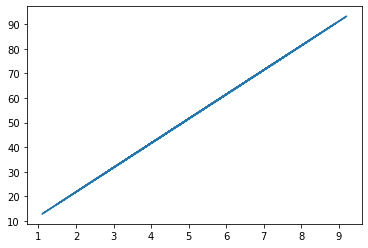

In [302]:
plt.plot(x_var,line) # plotting the line

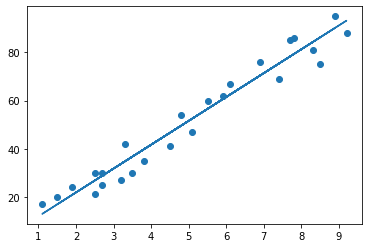

In [303]:
#plotting for test data
plt.scatter(x_var,y_var)
plt.plot(x_var,line)

# Doing predictions on testing data

In [333]:
y_pred=pd.Series(reg_model.predict(X_test))

In [334]:
y_pred

0    16.884145
1    33.732261
2    75.357018
3    26.794801
4    60.491033
dtype: float64

In [335]:
final=pd.concat([pd.Series(y_test),y_pred],axis=1)

In [336]:
final.columns=['Actual','Predicted']

In [337]:
final

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


# Model validation

In [310]:
from sklearn import metrics

In [314]:
print('Mean absolute error:',metrics.mean_absolute_error(final.Actual,final.Predicted))
print('Mean squared error:', metrics.mean_squared_error(final.Actual,final.Predicted))
print('Root mean squared error:', np.sqrt(metrics.mean_squared_error(final.Actual,final.Predicted)))


Mean absolute error: 4.183859899002975
Mean squared error: 21.598769307217406
Root mean squared error: 4.647447612100367


# The value of RMSE is low and quite acceptable due to very less number of variables, this shows that our model is doing good job and now we use this model for final prediction.

In [328]:
hour=[[9.25]]
predict=reg_model.predict(hour)
print(' if a student studies for 9.25 hrs/ day the score will be',predict[0])

 if a student studies for 9.25 hrs/ day the score will be 93.69173248737535


# Thank you